## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1bkcr55sW6BrcgKVPEGTb3vvhpnrklKKq?usp=sharing

Fill in cells below and fit neural networks for solving the binary classification task.

**Requirement**
- Python, Pytorch (Must), and all other necessary libraries
- **Just don't cheat, Thanks!**
- Sample output is to help you understand the task, and get an idea of what you have to do
- Dur date is Nov 10, 11:59pm. You ONLY need to submit this notebook. Include instructions to run your code.

## Task 1(25 points):

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Research on how to load google drive files into colab if you are using colab

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/test-20230725T062948Z-001.zip' ./
!cp '/content/drive/MyDrive/Colab Notebooks/train-20230725T062949Z-001.zip' ./
!cp '/content/drive/MyDrive/Colab Notebooks/val-20230725T062951Z-001.zip' ./

In [ ]:
!unzip /content/test-20230725T062948Z-001.zip

Archive:  /content/test-20230725T062948Z-001.zip
   creating: test/
   creating: test/cats/
  inflating: test/cats/cat.11245.jpg  
  inflating: test/cats/cat.10141.jpg  
  inflating: test/cats/cat.10774.jpg  
  inflating: test/cats/cat.10509.jpg  
  inflating: test/cats/cat.10449.jpg  
  inflating: test/cats/cat.11154.jpg  
  inflating: test/cats/cat.10186.jpg  
  inflating: test/cats/cat.10392.jpg  
  inflating: test/cats/cat.10974.jpg  
  inflating: test/cats/cat.10062.jpg  
  inflating: test/cats/cat.10737.jpg  
  inflating: test/cats/cat.10814.jpg  
  inflating: test/cats/cat.10722.jpg  
  inflating: test/cats/cat.10402.jpg  
  inflating: test/cats/cat.10358.jpg  
  inflating: test/cats/cat.11042.jpg  
  inflating: test/cats/cat.10482.jpg  
  inflating: test/cats/cat.10700.jpg  
  inflating: test/cats/cat.10060.jpg  
  inflating: test/cats/cat.11164.jpg  
  inflating: test/cats/cat.11241.jpg  
  inflating: test/cats/cat.10292.jpg  
  inflating: test/cats/cat.10736.jpg  
  inflating

In [ ]:
!unzip /content/train-20230725T062949Z-001.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.3989.jpg  
  inflating: train/dogs/dog.8711.jpg  
  inflating: train/dogs/dog.1823.jpg  
  inflating: train/dogs/dog.3894.jpg  
  inflating: train/dogs/dog.4037.jpg  
  inflating: train/dogs/dog.7875.jpg  
  inflating: train/dogs/dog.335.jpg  
  inflating: train/dogs/dog.917.jpg  
  inflating: train/dogs/dog.8230.jpg  
  inflating: train/dogs/dog.9648.jpg  
  inflating: train/dogs/dog.6077.jpg  
  inflating: train/dogs/dog.3449.jpg  
  inflating: train/dogs/dog.1951.jpg  
  inflating: train/dogs/dog.5278.jpg  
  inflating: train/dogs/dog.1425.jpg  
  inflating: train/dogs/dog.536.jpg  
  inflating: train/dogs/dog.784.jpg  
  inflating: train/dogs/dog.2333.jpg  
  inflating: train/dogs/dog.2762.jpg  
  inflating: train/dogs/dog.2912.jpg  
  inflating: train/dogs/dog.4749.jpg  
  inflating: train/dogs/dog.6895.jpg  
  inflating: train/dogs/dog.8444.jpg  
  inflating: train/dogs/dog.6037.jpg  
  inflating: trai

In [ ]:
!unzip /content/val-20230725T062951Z-001.zip

Archive:  /content/val-20230725T062951Z-001.zip
   creating: val/
   creating: val/cats/
  inflating: val/cats/cat.12109.jpg  
  inflating: val/cats/cat.12356.jpg  
  inflating: val/cats/cat.12036.jpg  
  inflating: val/cats/cat.11882.jpg  
  inflating: val/cats/cat.11583.jpg  
  inflating: val/cats/cat.11871.jpg  
  inflating: val/cats/cat.11660.jpg  
  inflating: val/cats/cat.11968.jpg  
  inflating: val/cats/cat.12277.jpg  
  inflating: val/cats/cat.12162.jpg  
  inflating: val/cats/cat.11541.jpg  
  inflating: val/cats/cat.11685.jpg  
  inflating: val/cats/cat.11811.jpg  
  inflating: val/cats/cat.11316.jpg  
  inflating: val/cats/cat.11634.jpg  
  inflating: val/cats/cat.12452.jpg  
  inflating: val/cats/cat.11908.jpg  
  inflating: val/cats/cat.11927.jpg  
  inflating: val/cats/cat.11791.jpg  
  inflating: val/cats/cat.12466.jpg  
  inflating: val/cats/cat.11988.jpg  
  inflating: val/cats/cat.12143.jpg  
  inflating: val/cats/cat.12421.jpg  
  inflating: val/cats/cat.12387.jpg  

In [ ]:
!ls train/dogs/ | wc -l

10000


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [ ]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = 'train'
val = 'val'
test = 'test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 4
# train set size
nb_train_samples = 20000
# validation set size
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

resize = transforms.Resize(size=(img_height, img_width))
trainTransforms = transforms.Compose([resize, transforms.ToTensor()])
testTransforms = transforms.Compose([resize, transforms.ToTensor()])

train_path = '/content/train/'
test_path = '/content/test/'
val_path = '/content/val/'

train_data = ImageFolder(train_path, transform=trainTransforms)
test_data = ImageFolder(test_path, transform=testTransforms)
val_data = ImageFolder(val_path, transform=testTransforms)
# Setup the batch size hyperparameter
BATCH_SIZE = batch_size

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

val_dataloader = DataLoader(val_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x797289e2d060>, <torch.utils.data.dataloader.DataLoader object at 0x797289f3b340>)
Length of train dataloader: 5000 batches of 4
Length of test dataloader: 625 batches of 4


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. flatten, which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use Dropout (0.5) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.


In [27]:
import torch.nn as nn
import torch.nn.functional as F
import torch


class CatsVsDogsModel(nn.Module):
    def __init__(self):
        super(CatsVsDogsModel, self).__init__()

        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_model = nn.Sequential(
            nn.Linear(64 * 17 * 17, 64),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [28]:
import torch.optim as optim
from torch.autograd import Variable

model = CatsVsDogsModel()
model = model.cuda()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
epoch_losses_train = []
epoch_accuracies_train = []
epoch_losses_test = []
epoch_accuracies_test = []
p=20
for epoch in range(p):  # loop over the dataset multiple times
    model.train()
    running_loss_train = 0.0
    running_corrects_train = 0
    count_train = 0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print(inputs)
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        # print(inputs)
        #print(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        # TODO: calculate the preds
        outputs = outputs.squeeze()
        preds = (outputs > 0.5).float()
        loss = criterion(outputs.float(), labels.float())
        #print(preds.float())
        #print(labels)
        #print(loss)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss_train += loss.item()
        running_corrects_train += torch.sum(preds == labels.data)
        count_train += len(preds)

    epoch_loss_train = running_loss_train / len(train_dataloader)
    epoch_accuracy_train= 100.0 * running_corrects_train / count_train
    epoch_losses_train.append(epoch_loss_train)
    epoch_accuracies_train.append(epoch_accuracy_train)

    model.eval()
    running_loss_test = 0.0
    running_corrects_test = 0
    count_test = 0
    with torch.no_grad():
        for i, data in enumerate(test_dataloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # print(inputs)
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            # print(inputs)
            #print(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            # TODO: calculate the preds
            outputs = outputs.squeeze()
            preds = (outputs > 0.5).float()
            loss = criterion(outputs.float(), labels.float())
            #print(preds.float())
            #print(labels)
            #print(loss)
            #loss.backward()
            #optimizer.step()

            # print statistics
            running_loss_test += loss.item()
            running_corrects_test += torch.sum(preds == labels.data)
            count_test += len(preds)
    epoch_loss_test = running_loss_test / len(test_dataloader)
    epoch_accuracy_test= 100.0 * running_corrects_test / count_test
    epoch_losses_test.append(epoch_loss_test)
    epoch_accuracies_test.append(epoch_accuracy_test)
    print(f"Epoch [{epoch + 1}/{p}], Train Accuracy: {epoch_accuracy_train:.4f}, Train Loss: {epoch_loss_train:.4f}, Test Accuracy: {epoch_accuracy_test:.4f}, Test Loss: {epoch_loss_test:.4f}")

Epoch [1/20], Train Accuracy: 53.4050, Train Loss: 0.6895, Test Accuracy: 57.2000, Test Loss: 0.6766
Epoch [2/20], Train Accuracy: 61.1000, Train Loss: 0.6584, Test Accuracy: 67.4800, Test Loss: 0.6119
Epoch [3/20], Train Accuracy: 68.6750, Train Loss: 0.5907, Test Accuracy: 73.1600, Test Loss: 0.5349
Epoch [4/20], Train Accuracy: 74.0450, Train Loss: 0.5317, Test Accuracy: 75.1600, Test Loss: 0.5034
Epoch [5/20], Train Accuracy: 76.8250, Train Loss: 0.4829, Test Accuracy: 77.6800, Test Loss: 0.4607
Epoch [6/20], Train Accuracy: 79.4650, Train Loss: 0.4438, Test Accuracy: 78.0400, Test Loss: 0.4577
Epoch [7/20], Train Accuracy: 81.6200, Train Loss: 0.4101, Test Accuracy: 78.8400, Test Loss: 0.4487
Epoch [8/20], Train Accuracy: 83.7350, Train Loss: 0.3704, Test Accuracy: 80.1200, Test Loss: 0.4307
Epoch [9/20], Train Accuracy: 85.6250, Train Loss: 0.3313, Test Accuracy: 79.5600, Test Loss: 0.4458
Epoch [10/20], Train Accuracy: 87.8650, Train Loss: 0.2866, Test Accuracy: 81.6400, Test Lo

In [31]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong
# Test the accuracy
def evaluate_model(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.cuda(), labels.cuda()
        with torch.no_grad():
            outputs = model(inputs)
            loss = criterion(outputs, labels.float().view(-1, 1))

        preds = (outputs > 0.5).float()
        running_corrects += torch.sum(preds == labels.view_as(preds))
        running_loss += loss.item() * inputs.size(0)
        total_samples += labels.size(0)

    epoch_loss = running_loss / total_samples
    epoch_acc = running_corrects.double() / total_samples

    return epoch_loss, epoch_acc


print("Train Accuracy at 10 epochs:", epoch_accuracies_train[9].item())
print("Test Accuracy at 10 epochs:", epoch_accuracies_test[9].item())

print("Train Accuracy at 15 epochs:", epoch_accuracies_train[14].item())
print("Test Accuracy at 15 epochs:", epoch_accuracies_test[14].item())

print("Train Accuracy at 20 epochs:", epoch_accuracies_train[19].item())
print("Test Accuracy at 20 epochs:", epoch_accuracies_test[19].item())

val_loss, val_accuracy = evaluate_model(model, val_dataloader, criterion)
print(f"Validation Loss: {val_loss*100:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.4f}")

Train Accuracy at 10 epochs: 87.86499786376953
Test Accuracy at 10 epochs: 81.63999938964844
Train Accuracy at 15 epochs: 93.98999786376953
Test Accuracy at 15 epochs: 81.0
Train Accuracy at 20 epochs: 96.33999633789062
Test Accuracy at 20 epochs: 81.43999481201172
Validation Loss: 99.8207
Validation Accuracy: 80.9639


Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

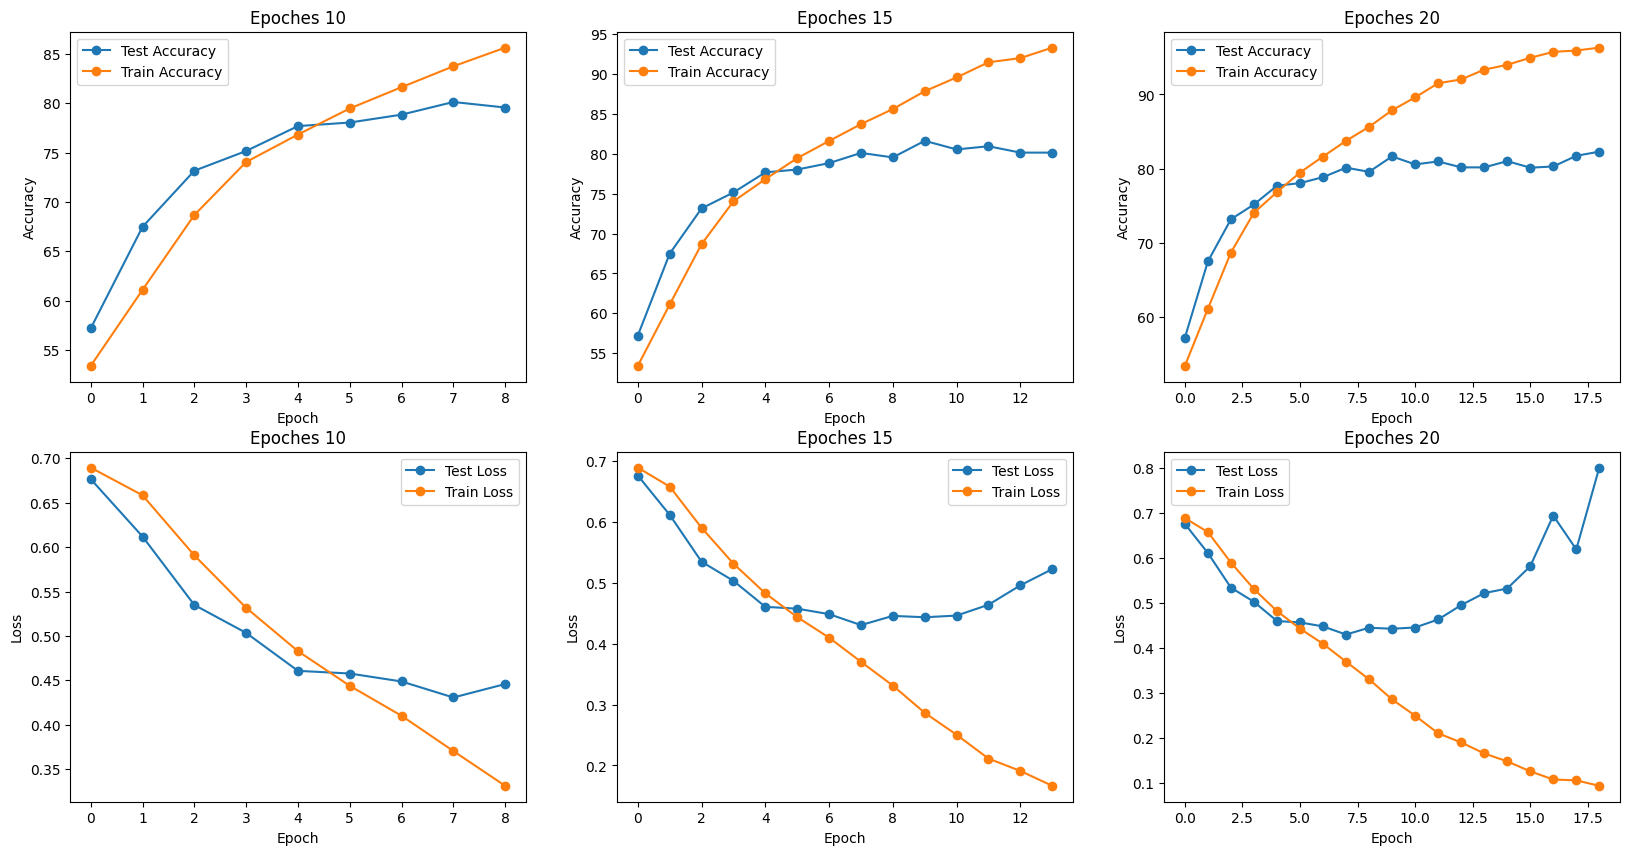

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

epoch_accuracies_test_10 = [accuracy.item() for accuracy in epoch_accuracies_test[:9]]
epoch_accuracies_train_10 = [accuracy.item() for accuracy in epoch_accuracies_train[:9]]
epoch_accuracies_test_15 = [accuracy.item() for accuracy in epoch_accuracies_test[:14]]
epoch_accuracies_train_15 = [accuracy.item() for accuracy in epoch_accuracies_train[:14]]
epoch_accuracies_test_20 = [accuracy.item() for accuracy in epoch_accuracies_test[:19]]
epoch_accuracies_train_20 = [accuracy.item() for accuracy in epoch_accuracies_train[:19]]

plt.subplot(2, 3, 1)
plt.plot(epoch_accuracies_test_10, marker='o', label='Test Accuracy')
plt.plot(epoch_accuracies_train_10, marker='o', label='Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Epoches 10')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(epoch_accuracies_test_15, marker='o', label='Test Accuracy')
plt.plot(epoch_accuracies_train_15, marker='o', label='Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Epoches 15')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(epoch_accuracies_test_20, marker='o', label='Test Accuracy')
plt.plot(epoch_accuracies_train_20, marker='o', label='Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Epoches 20')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(epoch_losses_test[:9], marker='o', label='Test Loss')
plt.plot(epoch_losses_train[:9], marker='o', label='Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Epoches 10')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(epoch_losses_test[:14], marker='o', label='Test Loss')
plt.plot(epoch_losses_train[:14], marker='o', label='Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Epoches 15')
plt.legend()

plt.subplot(2, 3, 6)
plt.plot(epoch_losses_test[:19], marker='o', label='Test Loss')
plt.plot(epoch_losses_train[:19], marker='o', label='Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Epoches 20')
plt.legend()

plt.show()

Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2(25 points)

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [33]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()





Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [34]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

model = Sequential(name="sequential_6")
model.add(base_model)
model.add(Flatten(name='flatten_6'))
model.add(Dense(256, name='dense_12'))
model.add(Activation('relu', name='activation_30'))
model.add(Dropout(0.5, name='dropout_6'))
model.add(Dense(1, name='dense_13'))
model.add(Activation('sigmoid', name='activation_31'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               2097408   
                                                                 
 activation_30 (Activation)  (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
 activation_31 (Activation)  (None, 1)                

In [35]:
# Implement the code to train the model
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./150)
test_datagen = ImageDataGenerator(rescale=1./150)

train_generator = train_datagen.flow_from_directory(
    '/content/train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    '/content/test/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

val_generator = test_datagen.flow_from_directory(
    '/content/val/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Epoch 1/10
625/625 [==============================] - 60s 94ms/step - loss: 0.2490 - accuracy: 0.8978 - val_loss: 0.1805 - val_accuracy: 0.9248
Epoch 2/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1737 - accuracy: 0.9280 - val_loss: 0.1674 - val_accuracy: 0.9328
Epoch 3/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1534 - accuracy: 0.9369 - val_loss: 0.1733 - val_accuracy: 0.9292
Epoch 4/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1344 - accuracy: 0.9448 - val_loss: 0.1783 - val_accuracy: 0.9272
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1244 - accuracy: 0.9505 - val_loss: 0.1718 - val_accuracy: 0.9308
Epoch 6/10
625/625 [==============================] - 57s 92ms/step - loss: 0.1112 - accuracy: 0.9557 - val_loss: 0.1664 - val_accuracy: 0.9316
Epoch 7/1

In [36]:
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"validation Loss: {test_loss*100}")
print(f"validation accuracy: {test_accuracy*100}")

78/78 [==============================] - 6s 73ms/step - loss: 0.1960 - accuracy: 0.9349
validation Loss: 19.60383951663971
validation accuracy: 93.49397420883179


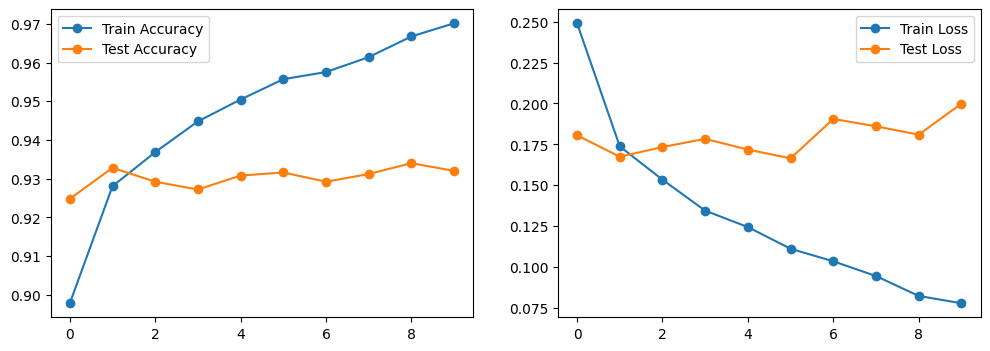

In [38]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Test Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Test Loss')
plt.legend()





plt.show()

# Save and Showcase how good is your model

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
def predict_image_with_threshold(img_path, threshold=0.5):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 150.

    prediction = model.predict(img_array)

    predicted_probability = prediction[0][0]

    predicted_class = 'dog' if predicted_probability > threshold else 'cat'

    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(f"This image is a {predicted_class}.")
    return predicted_class, predicted_probability

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/dog.11.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/doj.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/R.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/dg.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP_1.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP_2.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP_7.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP_4.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP_9.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP_5.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP_6.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP_8.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP_3.jpg', threshold=0.5)

predicted_class, predicted_probability = predict_image_with_threshold('/content/drive/MyDrive/Colab Notebooks/OIP_10.jpg', threshold=0.5)

Output hidden; open in https://colab.research.google.com to view.

In this task, we will create and train a ResNet-based model from scratch to improve classification accuracy.

## Task 3(25 points)
Build and Train ResNet-based Model:

Design a ResNet-based neural network architecture, customizing the number of layers, channels, and other hyperparameters based on classification task.

Plot Loss and Accuracy

Evaluate accuracy on validation and test datasets separately.

In [ ]:
import torch
import torch.nn as nn

# Define the basic building blocks of a ResNet: Residual Block and Residual Layer
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection to match dimensions
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self.make_layer(block, 64, layers[0])
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        #TODO: you need to implement the forward function
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

# Create a ResNet model
resnet = ResNet(ResidualBlock, [2, 2, 2, 2], num_classes=1)

In [ ]:
import torch.optim as optim
from torch.autograd import Variable

resnet = resnet.cuda()  #

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)
epoch_losses_train = []
epoch_accuracies_train = []
epoch_losses_test = []
epoch_accuracies_test = []
p = 10

for epoch in range(p):
    resnet.train()
    running_loss_train = 0.0
    running_corrects_train = 0
    count_train = 0

    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        optimizer.zero_grad()

        outputs = resnet(inputs)
        outputs = outputs.squeeze()
        preds = (outputs > 0.5).float()
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        running_loss_train += loss.item()
        running_corrects_train += torch.sum(preds == labels.data)
        count_train += labels.size(0)

    epoch_loss_train = running_loss_train / len(train_dataloader)
    epoch_accuracy_train = running_corrects_train.float() / count_train
    epoch_losses_train.append(epoch_loss_train)
    epoch_accuracies_train.append(epoch_accuracy_train.item())

    resnet.eval()
    running_loss_test = 0.0
    running_corrects_test = 0
    count_test = 0

    with torch.no_grad():
        for i, data in enumerate(test_dataloader, 0):
            inputs, labels = data
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

            outputs = resnet(inputs)
            outputs = outputs.squeeze()
            preds = (outputs > 0.5).float()
            loss = criterion(outputs, labels.float())

            running_loss_test += loss.item()
            running_corrects_test += torch.sum(preds == labels.data)
            count_test += labels.size(0)

    epoch_loss_test = running_loss_test / len(test_dataloader)
    epoch_accuracy_test = running_corrects_test.float() / count_test
    epoch_losses_test.append(epoch_loss_test)
    epoch_accuracies_test.append(epoch_accuracy_test.item())

    print(f"Epoch [{epoch + 1}/{p}], Train Accuracy: {epoch_accuracy_train*100:.4f}, Train Loss: {epoch_loss_train*100:.4f}, Test Accuracy: {epoch_accuracy_test*100:.4f}, Test Loss: {epoch_loss_test*100:.4f}")


Epoch [1/10], Train Accuracy: 54.7100, Train Loss: 68.4555, Test Accuracy: 55.2800, Test Loss: 65.1168
Epoch [2/10], Train Accuracy: 60.0900, Train Loss: 64.6970, Test Accuracy: 68.9200, Test Loss: 58.9457
Epoch [3/10], Train Accuracy: 69.2250, Train Loss: 56.3976, Test Accuracy: 75.6800, Test Loss: 48.5585
Epoch [4/10], Train Accuracy: 78.1400, Train Loss: 43.8365, Test Accuracy: 80.4800, Test Loss: 38.1758
Epoch [5/10], Train Accuracy: 84.0400, Train Loss: 34.3846, Test Accuracy: 82.8000, Test Loss: 38.9787
Epoch [6/10], Train Accuracy: 87.0050, Train Loss: 28.8285, Test Accuracy: 81.3600, Test Loss: 34.6004
Epoch [7/10], Train Accuracy: 89.2050, Train Loss: 24.7164, Test Accuracy: 88.5600, Test Loss: 28.1628
Epoch [8/10], Train Accuracy: 91.1050, Train Loss: 20.7248, Test Accuracy: 87.4400, Test Loss: 25.2334
Epoch [9/10], Train Accuracy: 92.6750, Train Loss: 17.4677, Test Accuracy: 87.8000, Test Loss: 27.6270
Epoch [10/10], Train Accuracy: 93.8050, Train Loss: 14.8076, Test Accurac

In [21]:
# Test the accuracy
def evaluate_model(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.cuda(), labels.cuda()
        with torch.no_grad():
            outputs = model(inputs)
            loss = criterion(outputs, labels.float().view(-1, 1))

        preds = torch.sigmoid(outputs) > 0.5
        running_corrects += torch.sum(preds == labels.view_as(preds))
        running_loss += loss.item() * inputs.size(0)
        total_samples += labels.size(0)

    epoch_loss = running_loss / total_samples
    epoch_acc = running_corrects.double() / total_samples

    return epoch_loss, epoch_acc

print("Train Accuracy:", epoch_accuracies_train[9]*100)
print("Train loss Accuracy:", epoch_losses_train[9]*100)



test_loss, test_accuracy = evaluate_model(resnet, test_dataloader, criterion)
print(f"Test Loss: {test_loss*100:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.4f}")

val_loss, val_accuracy = evaluate_model(resnet, val_dataloader, criterion)
print(f"Validation Loss: {val_loss*100:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.4f}")


Train Accuracy: 93.80499720573425
Train loss Accuracy: 14.807592778332474
Test Loss: 27.7362
Test Accuracy: 88.3600
Validation Loss: 23.3251
Validation Accuracy: 90.1205


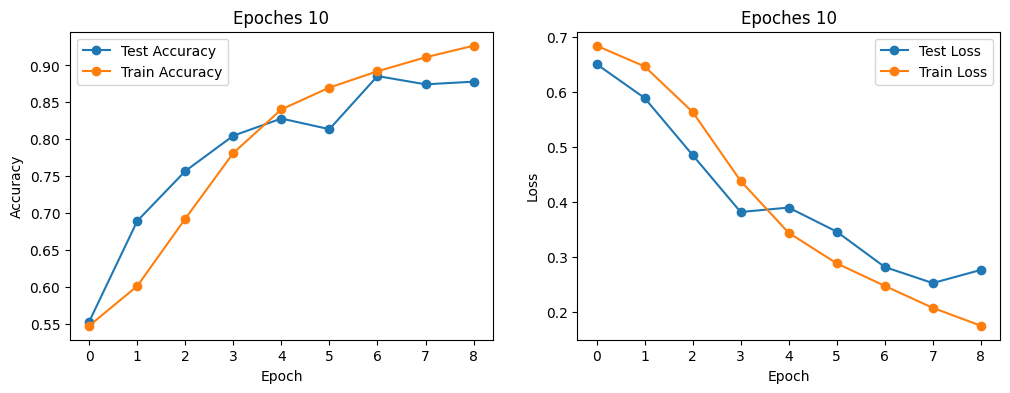

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

epoch_accuracies_test_10 = [accuracy for accuracy in epoch_accuracies_test[:9]]
epoch_accuracies_train_10 = [accuracy for accuracy in epoch_accuracies_train[:9]]

plt.subplot(1, 2, 1)
plt.plot(epoch_accuracies_test_10, marker='o', label='Test Accuracy')
plt.plot(epoch_accuracies_train_10, marker='o', label='Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Epoches 10')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_losses_test[:9], marker='o', label='Test Loss')
plt.plot(epoch_losses_train[:9], marker='o', label='Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Epoches 10')
plt.legend()

In this task, we will create and train a UNet-based model from scratch to improve classification accuracy.

## Task 4(25 points)
Build and Train UNet-based Model for binary classification task:

Design a UNet-based neural network architecture, customizing the encoder,bottleneck, and the decoder structure.

Plot Loss and Accuracy

Evaluate accuracy on test datasets.

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(EncoderBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.pool(x)
        return x

class BottleneckBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(BottleneckBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, middle_channels, out_channels):
        super(DecoderBlock, self).__init__()
        self.up = nn.ConvTranspose2d(in_channels, middle_channels, kernel_size=2, stride=2)
        self.conv = nn.Conv2d(middle_channels + out_channels, out_channels, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x, bridge):
        up = self.up(x)
        up = F.interpolate(up, size=(bridge.size(2), bridge.size(3)), mode='bilinear', align_corners=True)
        out = torch.cat([up, bridge], dim=1)
        out = self.conv(out)
        out = self.bn(out)
        out = self.relu(out)
        return out



class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.encoder1 = EncoderBlock(in_channels, 64)
        self.encoder2 = EncoderBlock(64, 128)
        self.encoder3 = EncoderBlock(128, 256)
        self.encoder4 = EncoderBlock(256, 512)

        self.bottleneck = BottleneckBlock(512, 1024)

        self.decoder4 = DecoderBlock(1024, 512, 512)
        self.decoder3 = DecoderBlock(512, 256, 256)
        self.decoder2 = DecoderBlock(256, 128, 128)
        self.decoder1 = DecoderBlock(128, 64, 64)

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(64, out_channels)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(enc1)
        enc3 = self.encoder3(enc2)
        enc4 = self.encoder4(enc3)

        bottleneck = self.bottleneck(enc4)

        dec4 = self.decoder4(bottleneck, enc4)
        dec3 = self.decoder3(dec4, enc3)
        dec2 = self.decoder2(dec3, enc2)
        dec1 = self.decoder1(dec2, enc1)

        out = self.classifier(dec1)
        return self.sigmoid(out)

# Create a U-Net model for binary classification
unet = UNet(in_channels=3, out_channels=1)
unet = unet.cuda()

# Define Binary Cross-Entropy loss and an optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(unet.parameters(), lr=0.001)


In [24]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader

unet = unet.cuda()

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(unet.parameters(), lr=0.001)

epoch_losses_train = []
epoch_accuracies_train = []
epoch_losses_test = []
epoch_accuracies_test = []
p = 10


for epoch in range(p):
    unet.train()
    running_loss_train = 0.0
    running_corrects_train = 0
    count_train = 0

    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda().view(-1, 1)

        optimizer.zero_grad()

        outputs = unet(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        running_loss_train += loss.item() * inputs.size(0)
        preds = (outputs > 0.5).float()
        running_corrects_train += torch.sum(preds == labels).item()
        count_train += labels.size(0)

    epoch_loss_train = running_loss_train / count_train
    epoch_accuracy_train = running_corrects_train / count_train
    epoch_losses_train.append(epoch_loss_train)
    epoch_accuracies_train.append(epoch_accuracy_train)

    unet.eval()
    running_loss_test = 0.0
    running_corrects_test = 0
    count_test = 0

    with torch.no_grad():
        for i, data in enumerate(test_dataloader, 0):
            inputs, labels = data
            inputs, labels = inputs.cuda(), labels.cuda().view(-1, 1)

            outputs = unet(inputs)
            loss = criterion(outputs, labels.float())

            running_loss_test += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            running_corrects_test += torch.sum(preds == labels).item()
            count_test += labels.size(0)

    epoch_loss_test = running_loss_test / count_test
    epoch_accuracy_test = running_corrects_test / count_test
    epoch_losses_test.append(epoch_loss_test)
    epoch_accuracies_test.append(epoch_accuracy_test)

    print(f"Epoch [{epoch + 1}/{p}], Train Accuracy: {epoch_accuracy_train*100:.2f}%, Train Loss: {epoch_loss_train:.4f}, Test Accuracy: {epoch_accuracy_test*100:.2f}%, Test Loss: {epoch_loss_test:.4f}")



Epoch [1/10], Train Accuracy: 56.09%, Train Loss: 0.6757, Test Accuracy: 62.32%, Test Loss: 0.6545
Epoch [2/10], Train Accuracy: 60.36%, Train Loss: 0.6632, Test Accuracy: 56.76%, Test Loss: 0.6669
Epoch [3/10], Train Accuracy: 65.62%, Train Loss: 0.6469, Test Accuracy: 70.88%, Test Loss: 0.6249
Epoch [4/10], Train Accuracy: 69.31%, Train Loss: 0.6350, Test Accuracy: 73.80%, Test Loss: 0.6431
Epoch [5/10], Train Accuracy: 70.97%, Train Loss: 0.6280, Test Accuracy: 78.92%, Test Loss: 0.5993
Epoch [6/10], Train Accuracy: 73.55%, Train Loss: 0.6188, Test Accuracy: 78.68%, Test Loss: 0.6004
Epoch [7/10], Train Accuracy: 74.97%, Train Loss: 0.6124, Test Accuracy: 79.04%, Test Loss: 0.5919
Epoch [8/10], Train Accuracy: 76.91%, Train Loss: 0.6057, Test Accuracy: 80.28%, Test Loss: 0.5875
Epoch [9/10], Train Accuracy: 78.94%, Train Loss: 0.5974, Test Accuracy: 84.60%, Test Loss: 0.5797
Epoch [10/10], Train Accuracy: 82.25%, Train Loss: 0.5836, Test Accuracy: 82.80%, Test Loss: 0.5783


In [25]:
# Test the accuracy
def evaluate_model(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.cuda(), labels.cuda()
        with torch.no_grad():
            outputs = model(inputs)
            loss = criterion(outputs, labels.float().view(-1, 1))

        preds = (outputs > 0.5).float()
        running_corrects += torch.sum(preds == labels.view_as(preds))
        running_loss += loss.item() * inputs.size(0)
        total_samples += labels.size(0)

    epoch_loss = running_loss / total_samples
    epoch_acc = running_corrects.double() / total_samples

    return epoch_loss, epoch_acc


print("Train loss:", epoch_losses_train[9]*100)
print("Train Accuracy:", epoch_accuracies_train[9]*100)


test_loss, test_accuracy = evaluate_model(unet, test_dataloader, criterion)
print(f"Test Loss: {test_loss*100:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.4f}")

val_loss, val_accuracy = evaluate_model(unet, val_dataloader, criterion)
print(f"Validation Loss: {val_loss*100:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.4f}")


Train loss: 58.36208172559738
Train Accuracy: 82.25
Test Loss: 57.8311
Test Accuracy: 82.8000
Validation Loss: 57.3267
Validation Accuracy: 83.3735


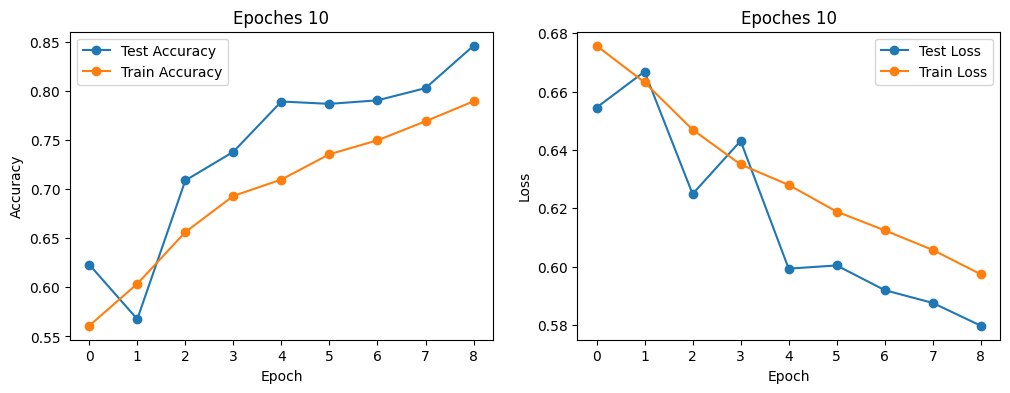

In [26]:
# Plot loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

epoch_accuracies_test_10 = [accuracy for accuracy in epoch_accuracies_test[:9]]
epoch_accuracies_train_10 = [accuracy for accuracy in epoch_accuracies_train[:9]]

plt.subplot(1, 2, 1)
plt.plot(epoch_accuracies_test_10, marker='o', label='Test Accuracy')
plt.plot(epoch_accuracies_train_10, marker='o', label='Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Epoches 10')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_losses_test[:9], marker='o', label='Test Loss')
plt.plot(epoch_losses_train[:9], marker='o', label='Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Epoches 10')
plt.legend()